In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 한글 깨짐
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,693 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: fall

In [ ]:
import pandas as pd
import numpy as np
import warnings
import os
from functools import reduce
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
sns.set_palette("pastel")
%matplotlib inline

# 데이터 불러오기

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/2022_경경학술제/데이터/data2.csv', encoding = 'cp949')
data.head() 

,Unnamed: 0,자치구,동,자치구_동,경상자수,중상자수,사망자수,부상신고자수,인구수,1인가구,면적,도로면적,교차로,단일로,횡단보도개수,교차로개수
0,0,강남구,개포동,강남구 개포동,30.0,19.0,0.0,5.0,51732,3888,5.27,1.242666,34.0,13.0,363,33
1,1,강남구,논현동,강남구 논현동,113.0,40.0,0.0,14.0,45731,11739,2.72,0.641376,53.0,74.0,910,35
2,2,강남구,대치동,강남구 대치동,88.0,34.0,1.0,31.0,83418,6426,3.52,0.830016,62.0,60.0,940,58
3,3,강남구,도곡동,강남구 도곡동,52.0,19.0,0.0,8.0,56269,3280,2.04,0.481032,36.0,29.0,432,36
4,4,강남구,삼성동,강남구 삼성동,53.0,33.0,0.0,13.0,43968,5669,3.18,0.749844,32.0,47.0,888,43


In [ ]:
data.drop(data.columns[0], axis=1, inplace=True)
data.rename(columns = {'교차로' : '교차로사고', '단일로' : '단일로사고'}, inplace=True)
data.head()

,자치구,동,자치구_동,경상자수,중상자수,사망자수,부상신고자수,인구수,1인가구,면적,도로면적,교차로사고,단일로사고,횡단보도개수,교차로개수
0,강남구,개포동,강남구 개포동,30.0,19.0,0.0,5.0,51732,3888,5.27,1.242666,34.0,13.0,363,33
1,강남구,논현동,강남구 논현동,113.0,40.0,0.0,14.0,45731,11739,2.72,0.641376,53.0,74.0,910,35
2,강남구,대치동,강남구 대치동,88.0,34.0,1.0,31.0,83418,6426,3.52,0.830016,62.0,60.0,940,58
3,강남구,도곡동,강남구 도곡동,52.0,19.0,0.0,8.0,56269,3280,2.04,0.481032,36.0,29.0,432,36
4,강남구,삼성동,강남구 삼성동,53.0,33.0,0.0,13.0,43968,5669,3.18,0.749844,32.0,47.0,888,43


# 전체 상관계수

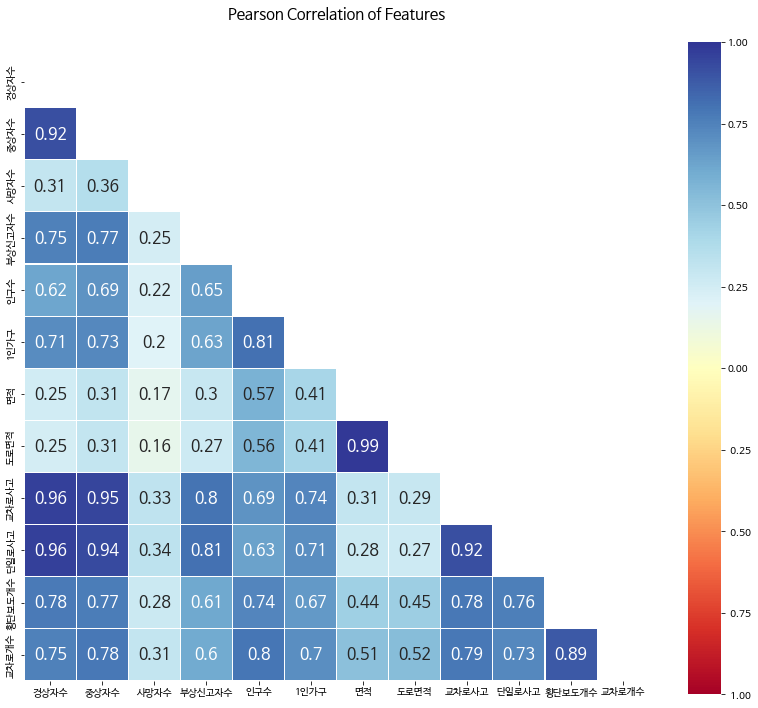

In [ ]:
heatmap_data = data.iloc[:, 3:]
colormap = plt.cm.RdYlBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
mask = np.zeros_like(heatmap_data.astype(float).corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, mask=mask, vmax=1.0, vmin=-1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size":16})

del heatmap_data

경상자수, 중상자수, 사망자수, 부상신고자수 모두 합친 column '사고건수a'  
경상자수, 중상자수, 부상신고자수 합친 column '사고건수b'
만들어서 다시 상관관계 파악

In [ ]:
data['사고건수a'] = data['경상자수']+data['중상자수']+data['부상신고자수']+data['사망자수']
data['사고건수b'] = data['경상자수']+data['중상자수']+data['부상신고자수']
data.head()

,자치구,동,자치구_동,경상자수,중상자수,사망자수,부상신고자수,인구수,1인가구,면적,도로면적,교차로사고,단일로사고,횡단보도개수,교차로개수,사고건수a,사고건수b
0,강남구,개포동,강남구 개포동,30.0,19.0,0.0,5.0,51732,3888,5.27,1.242666,34.0,13.0,363,33,54.0,54.0
1,강남구,논현동,강남구 논현동,113.0,40.0,0.0,14.0,45731,11739,2.72,0.641376,53.0,74.0,910,35,167.0,167.0
2,강남구,대치동,강남구 대치동,88.0,34.0,1.0,31.0,83418,6426,3.52,0.830016,62.0,60.0,940,58,154.0,153.0
3,강남구,도곡동,강남구 도곡동,52.0,19.0,0.0,8.0,56269,3280,2.04,0.481032,36.0,29.0,432,36,79.0,79.0
4,강남구,삼성동,강남구 삼성동,53.0,33.0,0.0,13.0,43968,5669,3.18,0.749844,32.0,47.0,888,43,99.0,99.0


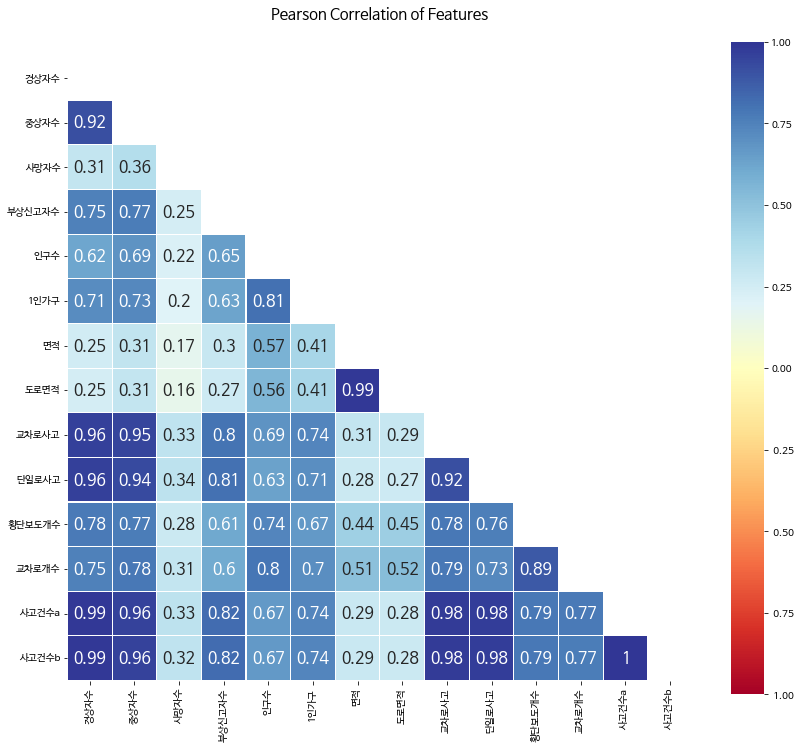

In [ ]:
heatmap_data = data.iloc[:, 3:]
colormap = plt.cm.RdYlBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
mask = np.zeros_like(heatmap_data.astype(float).corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, mask=mask, vmax=1.0, vmin=-1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size":16})

del heatmap_data

In [ ]:
print(data[data['사망자수'] > 0].shape)
print(data['사망자수'].max(), data['사망자수'].min())

(63, 17)
4.0 0.0


사망자수 존재하는 데이터가 적고, 그 건수도 적어서 변수에서 제외  
사망자수를 뺀 '경상자수 + 중상자수 + 부상신고자수'의 컬럼인 '사고건수b'를 예측변수로 설정

# 최종 데이터 정리

In [ ]:
data.drop(data.columns[-2], axis=1, inplace=True)
data.rename(columns = {'사고건수b' : '사고건수'}, inplace=True)
data.head()

,자치구,동,자치구_동,경상자수,중상자수,사망자수,부상신고자수,인구수,1인가구,면적,도로면적,교차로사고,단일로사고,횡단보도개수,교차로개수,사고건수
0,강남구,개포동,강남구 개포동,30.0,19.0,0.0,5.0,51732,3888,5.27,1.242666,34.0,13.0,363,33,54.0
1,강남구,논현동,강남구 논현동,113.0,40.0,0.0,14.0,45731,11739,2.72,0.641376,53.0,74.0,910,35,167.0
2,강남구,대치동,강남구 대치동,88.0,34.0,1.0,31.0,83418,6426,3.52,0.830016,62.0,60.0,940,58,153.0
3,강남구,도곡동,강남구 도곡동,52.0,19.0,0.0,8.0,56269,3280,2.04,0.481032,36.0,29.0,432,36,79.0
4,강남구,삼성동,강남구 삼성동,53.0,33.0,0.0,13.0,43968,5669,3.18,0.749844,32.0,47.0,888,43,99.0


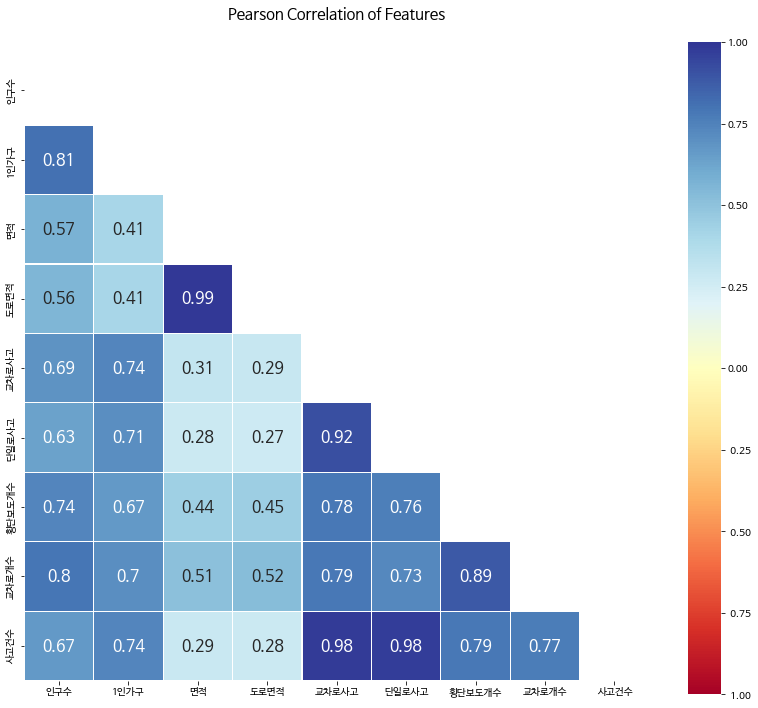

In [ ]:
heatmap_data = data.iloc[:, 7:]
colormap = plt.cm.RdYlBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
mask = np.zeros_like(heatmap_data.astype(float).corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, mask=mask, vmax=1.0, vmin=-1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size":16})

del heatmap_data

In [10]:
data.iloc[:,2:].head()

,자치구_동,경상자수,중상자수,사망자수,부상신고자수,인구수,1인가구,면적,도로면적,교차로사고,단일로사고,횡단보도개수,교차로개수,사고건수
0,강남구 개포동,30.0,19.0,0.0,5.0,51732,3888,5.27,1.242666,34.0,13.0,363,33,54.0
1,강남구 논현동,113.0,40.0,0.0,14.0,45731,11739,2.72,0.641376,53.0,74.0,910,35,167.0
2,강남구 대치동,88.0,34.0,1.0,31.0,83418,6426,3.52,0.830016,62.0,60.0,940,58,153.0
3,강남구 도곡동,52.0,19.0,0.0,8.0,56269,3280,2.04,0.481032,36.0,29.0,432,36,79.0
4,강남구 삼성동,53.0,33.0,0.0,13.0,43968,5669,3.18,0.749844,32.0,47.0,888,43,99.0


In [11]:
data[['자치구_동','인구수','1인가구','면적','도로면적','교차로사고','단일로사고','횡단보도개수','교차로개수','사고건수']].head()

,자치구_동,인구수,1인가구,면적,도로면적,교차로사고,단일로사고,횡단보도개수,교차로개수,사고건수
0,강남구 개포동,51732,3888,5.27,1.242666,34.0,13.0,363,33,54.0
1,강남구 논현동,45731,11739,2.72,0.641376,53.0,74.0,910,35,167.0
2,강남구 대치동,83418,6426,3.52,0.830016,62.0,60.0,940,58,153.0
3,강남구 도곡동,56269,3280,2.04,0.481032,36.0,29.0,432,36,79.0
4,강남구 삼성동,43968,5669,3.18,0.749844,32.0,47.0,888,43,99.0


# 상관관계 scatter plot

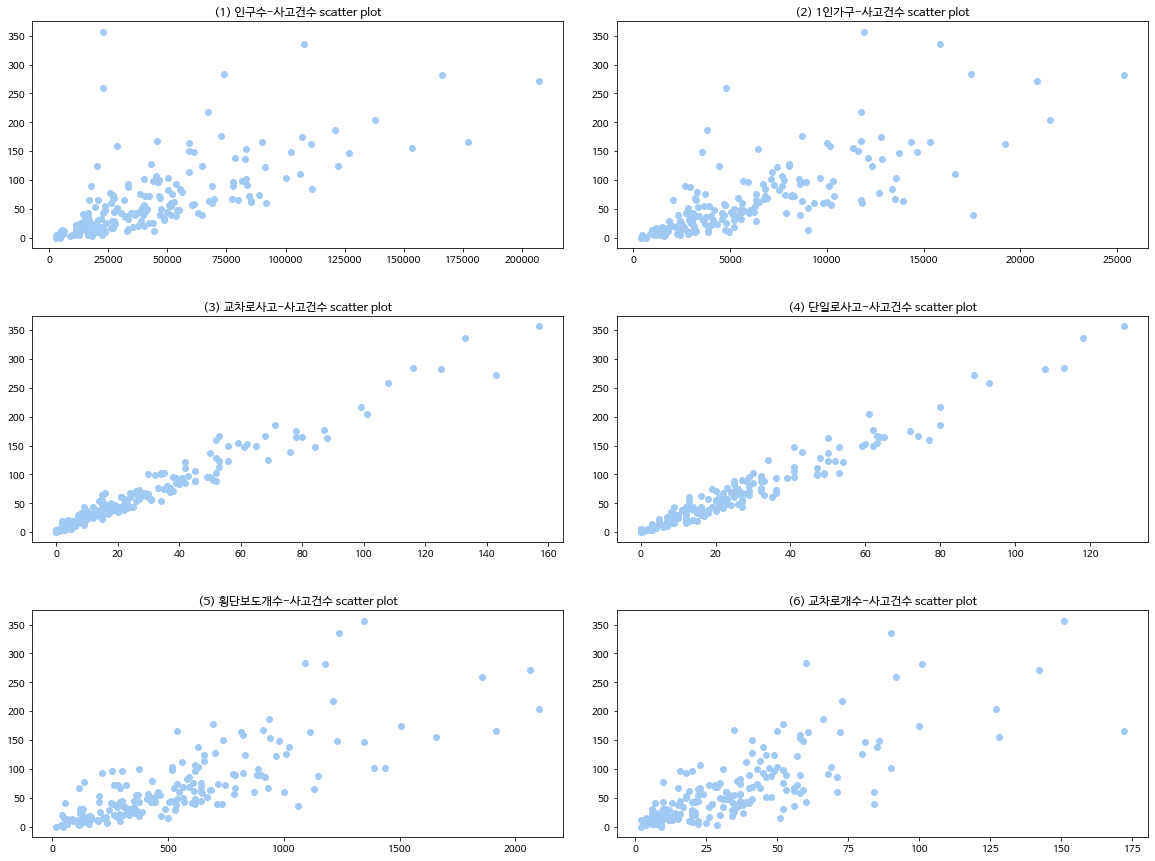

In [ ]:
f, ax = plt.subplots(3, 2, figsize=(20,15))

ax[0,0].scatter(data['인구수'], data['사고건수'])
ax[0,0].set_title('(1) 인구수-사고건수 scatter plot')

ax[0,1].scatter(data['1인가구'], data['사고건수'])
ax[0,1].set_title('(2) 1인가구-사고건수 scatter plot')

ax[1,0].scatter(data['교차로사고'], data['사고건수'])
ax[1,0].set_title('(3) 교차로사고-사고건수 scatter plot')

ax[1,1].scatter(data['단일로사고'], data['사고건수'])
ax[1,1].set_title('(4) 단일로사고-사고건수 scatter plot')

ax[2,0].scatter(data['횡단보도개수'], data['사고건수'])
ax[2,0].set_title('(5) 횡단보도개수-사고건수 scatter plot')

ax[2,1].scatter(data['교차로개수'], data['사고건수'])
ax[2,1].set_title('(6) 교차로개수-사고건수 scatter plot')

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

# 그래프

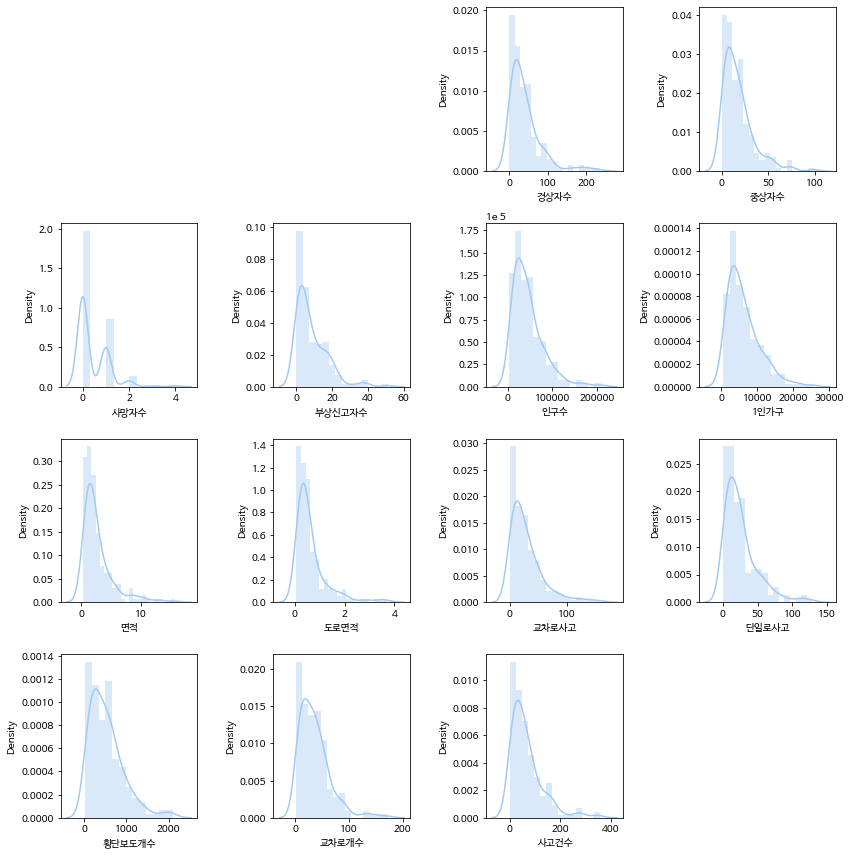

In [ ]:
# 동별
plt.figure(figsize=(12,12))
for i in range(3,16):
    plt.subplot(4,4,i)
    sns.distplot(data.iloc[:,i])  # distplot
plt.tight_layout()
plt.show()

In [ ]:
data['인구대비 부상자수'] = data['사고건수'] / data['인구수']

In [ ]:
data_hurt = data.sort_values(by=['인구대비 부상자수'],ascending=False)

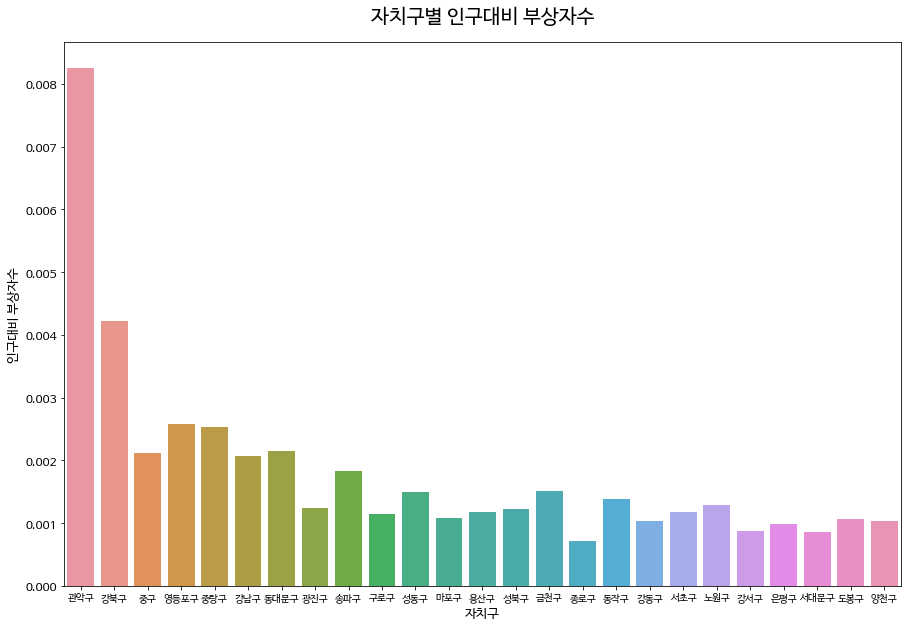

In [ ]:
plt.figure(figsize=(15,10))  
plt.rc('axes', labelsize=13)
plt.rc('xtick', labelsize=10)  
plt.rc('ytick', labelsize=12)  
plt.xticks(rotation = 0 )
sns.barplot(data=data_hurt, x="자치구", y="인구대비 부상자수", ci=None) 
plt.title("자치구별 인구대비 부상자수", fontsize=20, pad=20)
plt.show()

# 구별 데이터 확인

In [ ]:
data.자치구.nunique()

25

In [ ]:
gu_sum = data.groupby(['자치구'])['사고건수'].sum().to_frame().sort_values(by='사고건수', ascending=False)

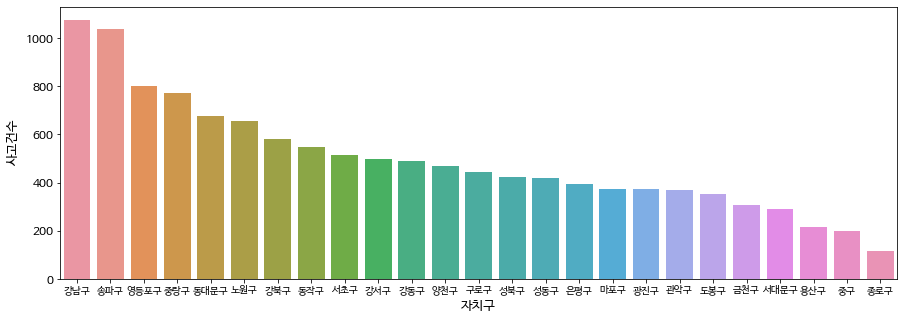

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data = gu_sum, x = gu_sum.index, y = '사고건수', ci = None)

강남구, 송파구, 영등포구 순

강남구

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

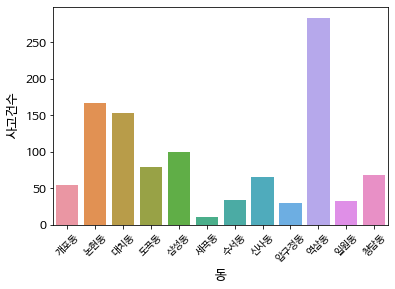

In [ ]:
sns.barplot(data = data.query('자치구 == "강남구"'), x = '동', y = '사고건수', ci = None)
plt.xticks(rotation=45)

송파구

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

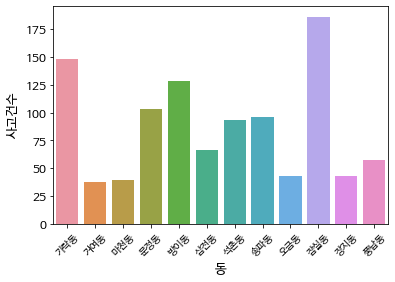

In [ ]:
sns.barplot(data = data.query('자치구 == "송파구"'), x = '동', y = '사고건수', ci = None)
plt.xticks(rotation=45)

중구

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

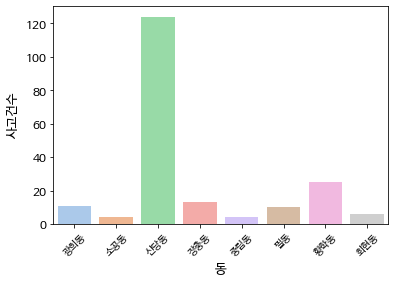

In [ ]:
sns.barplot(data = data.query('자치구 == "중구"'), x = '동', y = '사고건수', ci = None)
plt.xticks(rotation=45)

종로구

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

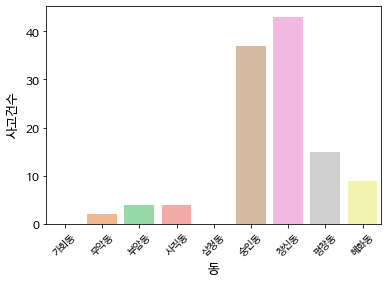

In [ ]:
sns.barplot(data = data.query('자치구 == "종로구"'), x = '동', y = '사고건수', ci = None)
plt.xticks(rotation=45)

# 교통사고 데이터(2019-2020)

In [ ]:
two_years = pd.read_csv('/content/drive/MyDrive/2022_경경학술제/데이터/교통사고데이터(2019-2020).csv', encoding='cp949')
two_years.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2019010100100001,2019년 1월 1일 00시,화요일,서울특별시 강서구 방화동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로횡단보도내,승용,남,26세,상해없음,보행자,남,40세,경상
1,2019010100100002,2019년 1월 1일 00시,화요일,서울특별시 구로구 고척동,경상사고,0,0,1,0,차대차 - 추돌,...,맑음,단일로 - 기타,이륜,남,23세,상해없음,승용,남,71세,경상
2,2019010100100003,2019년 1월 1일 00시,화요일,서울특별시 서초구 서초동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,기타 - 기타,승용,남,33세,상해없음,화물,남,51세,경상
3,2019010100100019,2019년 1월 1일 01시,화요일,서울특별시 중구 회현동2가,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,단일로 - 터널,승용,남,58세,상해없음,승용,남,62세,경상
4,2019010100100020,2019년 1월 1일 01시,화요일,서울특별시 성동구 행당동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로부근,승용,남,30세,상해없음,보행자,남,32세,경상


In [ ]:
two_years['사고건수'] = two_years['경상자수']+two_years['중상자수']+two_years['사망자수']+two_years['부상신고자수']

In [ ]:
two_years['사고건수']= two_years['사고건수'].astype('str')

In [ ]:
from datetime import datetime
two_years['사고일시']=two_years['사고일시'].apply(lambda _ : datetime.strptime(_,'%Y년 %m월 %d일 %H시'))
two_years['year'] = two_years.사고일시.dt.year
two_years['month'] = two_years.사고일시.dt.month
two_years['day'] = two_years.사고일시.dt.day
two_years.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사고건수,year,month,day
0,2019010100100001,2019-01-01 00:00:00,화요일,서울특별시 강서구 방화동,경상사고,0,0,1,0,차대사람 - 횡단중,...,26세,상해없음,보행자,남,40세,경상,1,2019,1,1
1,2019010100100002,2019-01-01 00:00:00,화요일,서울특별시 구로구 고척동,경상사고,0,0,1,0,차대차 - 추돌,...,23세,상해없음,승용,남,71세,경상,1,2019,1,1
2,2019010100100003,2019-01-01 00:00:00,화요일,서울특별시 서초구 서초동,경상사고,0,0,1,0,차대차 - 기타,...,33세,상해없음,화물,남,51세,경상,1,2019,1,1
3,2019010100100019,2019-01-01 01:00:00,화요일,서울특별시 중구 회현동2가,경상사고,0,0,1,0,차대차 - 측면충돌,...,58세,상해없음,승용,남,62세,경상,1,2019,1,1
4,2019010100100020,2019-01-01 01:00:00,화요일,서울특별시 성동구 행당동,경상사고,0,0,1,0,차대사람 - 횡단중,...,30세,상해없음,보행자,남,32세,경상,1,2019,1,1


In [ ]:
two_years = two_years[(two_years['가해운전자 차종'] == '이륜') | (two_years['가해운전자 차종'] == '원동기') |  (two_years['가해운전자 차종'] == '자전거') 
                            | (two_years['피해운전자 차종'] == '이륜') |  (two_years['피해운전자 차종'] == '원동기') |  (two_years['피해운전자 차종'] == '자전거')]

In [ ]:
# 시군구 --> 자치구, 동 분리
two_years['자치구'] = two_years['시군구'].apply(lambda x: x.split(' ')[1])
two_years['동'] = two_years['시군구'].apply(lambda x: x.split(' ')[2])

# "~~동~~가"일 경우 "~~가" 제거 ex) 당산동3가 --> 당산동
def del_ga(dong):
    n = len(dong)
    if dong[-1] == '가':
        new_dong = dong[:n-2]  # n-2인이유 : 당산동3가 할 때 "가"앞에 숫자 3도 제거해야하므로
        return new_dong
    else:
        return dong
two_years['동'] = two_years['동'].apply(del_ga)

# 충정로 --> 충현동으로 바꾸기
two_years['동'] = two_years['동'].apply(lambda x: "충현동" if x == '충정로' else x)

In [ ]:
two_years.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사고건수,year,month,day,자치구,동
1,2019010100100002,2019-01-01 00:00:00,화요일,서울특별시 구로구 고척동,경상사고,0,0,1,0,차대차 - 추돌,...,승용,남,71세,경상,1,2019,1,1,구로구,고척동
21,2019010100100086,2019-01-01 06:00:00,화요일,서울특별시 노원구 월계동,중상사고,0,1,0,0,차대차 - 기타,...,자전거,남,73세,중상,1,2019,1,1,노원구,월계동
28,2019010100100141,2019-01-01 11:00:00,화요일,서울특별시 서초구 서초동,경상사고,0,0,1,0,차대차 - 측면충돌,...,이륜,남,31세,경상,1,2019,1,1,서초구,서초동
31,2019010100100170,2019-01-01 13:00:00,화요일,서울특별시 서대문구 북아현동,경상사고,0,0,1,0,차대사람 - 횡단중,...,보행자,여,63세,경상,1,2019,1,1,서대문구,북아현동
38,2019010100100236,2019-01-01 17:00:00,화요일,서울특별시 중랑구 상봉동,경상사고,0,0,1,0,차대차 - 기타,...,승합,남,46세,상해없음,1,2019,1,1,중랑구,상봉동


In [ ]:
two_years['사고건수'] = pd.to_numeric(two_years['사고건수'])
year_gu_sum = pd.DataFrame(two_years.groupby(['year', '자치구'])['사고건수'].sum())
year_gu_sum = year_gu_sum.reset_index()

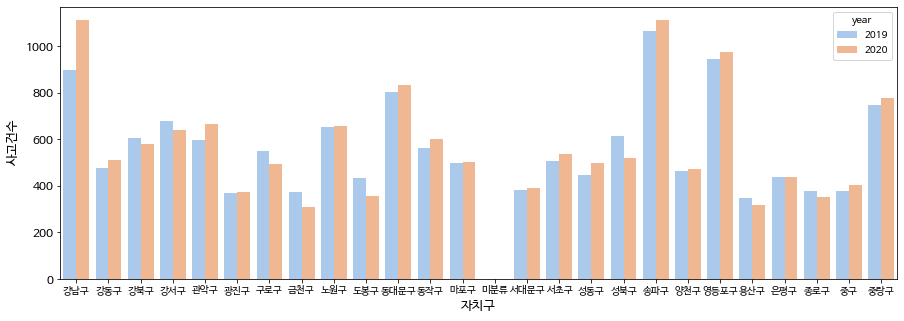

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=year_gu_sum, x='자치구', y='사고건수', hue='year')

In [ ]:
month_gu_sum = pd.DataFrame(two_years.groupby(['year', 'month'])['사고건수'].sum())
month_gu_sum = month_gu_sum.reset_index()

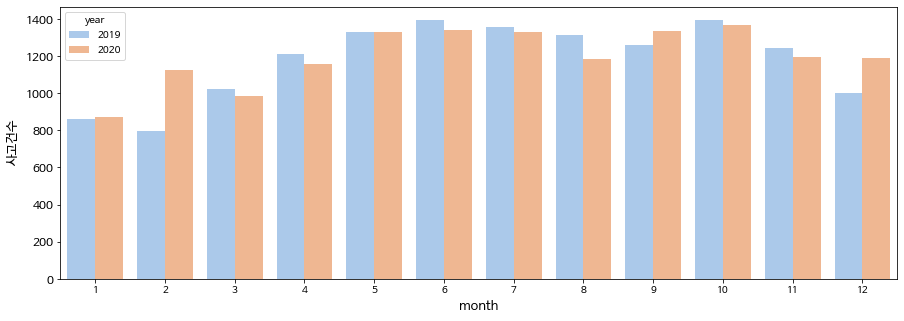

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=month_gu_sum, x='month', y='사고건수', hue='year')

In [ ]:
year_dong_sum = pd.DataFrame(two_years.groupby(['year', '자치구', '동'])['사고건수'].sum())
year_dong_sum = year_dong_sum.reset_index()

강남구

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

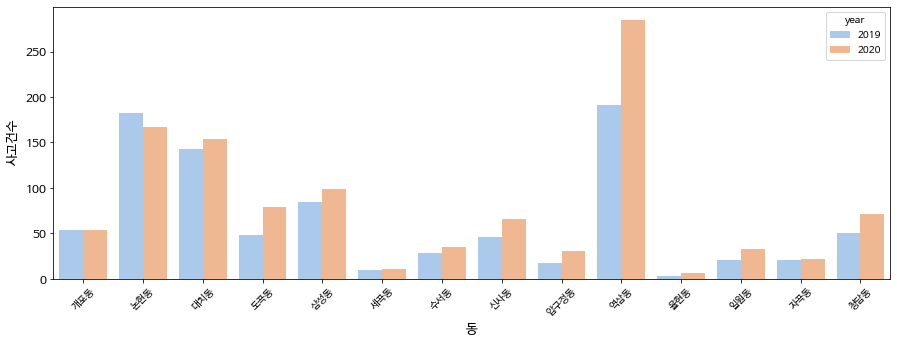

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data = year_dong_sum.query('자치구 == "강남구"'), x = '동', y = '사고건수', hue = 'year', ci = None)
plt.xticks(rotation=45)

송파구

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

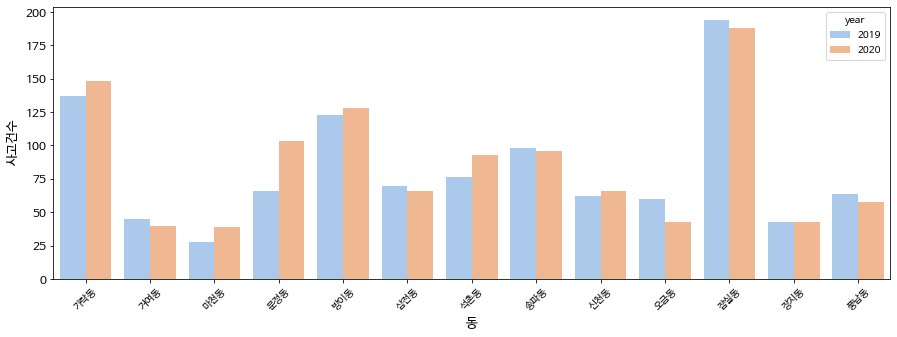

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data = year_dong_sum.query('자치구 == "송파구"'), x = '동', y = '사고건수', hue = 'year', ci = None)
plt.xticks(rotation=45)

중구

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

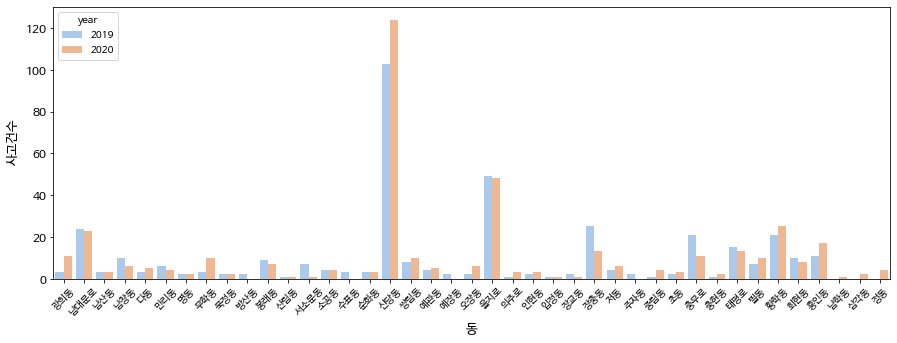

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data = year_dong_sum.query('자치구 == "중구"'), x = '동', y = '사고건수', hue = 'year', ci = None)
plt.xticks(rotation=45)

종로구

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 <a list of 65 Text major ticklabel objects>)

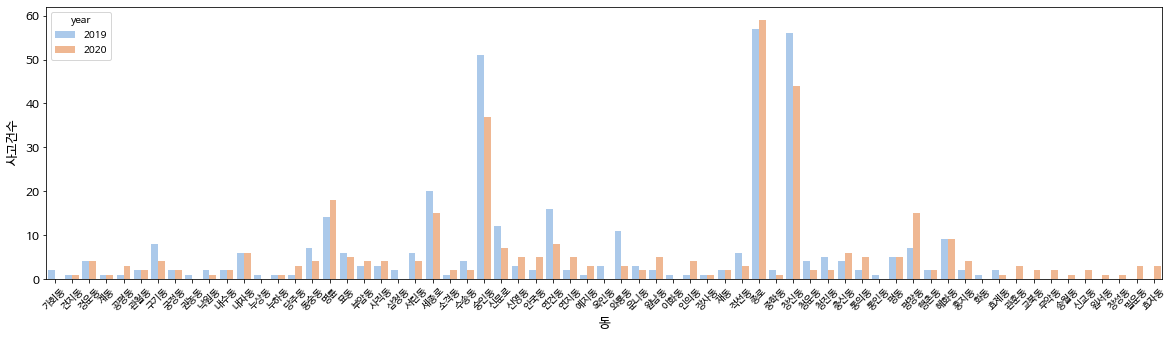

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(data = year_dong_sum.query('자치구 == "종로구"'), x = '동', y = '사고건수', hue = 'year', ci = None)
plt.xticks(rotation=45)

[2019] -> [2020]
1. 배달앱 
이용여부 : 11.2% -> 19.9%
 / 월 평균 비용 : 318,230 -> 360,436
2. 배달대행
이용여부 : 10% -> 15.4%
 / 월 평균 비용 : 611,564 -> 1,140,045

 by. kosis

# 사망자 존재하는 지역의 특징 찾기

In [ ]:
data_sm = data[data['사망자수'] > 0]      # 사망자 존재하는 행
data_sm_no = data.drop(data_sm.index)  # 사망자 존재하지 않는 행
print(data_sm.shape, data_sm_no.shape)

(63, 17) (122, 17)


In [ ]:
data.head()

,자치구,동,자치구_동,경상자수,중상자수,사망자수,부상신고자수,인구수,1인가구,면적,도로면적,교차로사고,단일로사고,횡단보도개수,교차로개수,사고건수,인구대비 부상자수
0,강남구,개포동,강남구 개포동,30.0,19.0,0.0,5.0,51732,3888,5.27,1.242666,34.0,13.0,363,33,54.0,0.001044
1,강남구,논현동,강남구 논현동,113.0,40.0,0.0,14.0,45731,11739,2.72,0.641376,53.0,74.0,910,35,167.0,0.003652
2,강남구,대치동,강남구 대치동,88.0,34.0,1.0,31.0,83418,6426,3.52,0.830016,62.0,60.0,940,58,153.0,0.001834
3,강남구,도곡동,강남구 도곡동,52.0,19.0,0.0,8.0,56269,3280,2.04,0.481032,36.0,29.0,432,36,79.0,0.001404
4,강남구,삼성동,강남구 삼성동,53.0,33.0,0.0,13.0,43968,5669,3.18,0.749844,32.0,47.0,888,43,99.0,0.002252


In [ ]:
# 사망자 존재하지 않는 데이터와 사망자 존재하는 데이터의 평균
print(data_sm_no['인구수'].mean(), data_sm['인구수'].mean())
print(data_sm_no['1인가구'].mean(), data_sm['1인가구'].mean())
print(data_sm_no['도로면적'].mean(), data_sm['도로면적'].mean())
print(data_sm_no['횡단보도개수'].mean(), data_sm['횡단보도개수'].mean())
print(data_sm_no['교차로개수'].mean(), data_sm['교차로개수'].mean())

37719.58196721312 60470.28571428572
5489.2213114754095 7662.190476190476
0.5254640819672131 0.8441666507936508
443.5409836065574 692.047619047619
30.475409836065573 48.06349206349206


t-test 통해 두 집단 평균 비교

In [ ]:
import scipy.stats
print(scipy.stats.ttest_ind(data_sm_no['인구수'], data_sm['인구수'], equal_var=False))
print(scipy.stats.ttest_ind(data_sm_no['1인가구'], data_sm['1인가구'], equal_var=False))
print(scipy.stats.ttest_ind(data_sm_no['도로면적'], data_sm['도로면적'], equal_var=False))
print(scipy.stats.ttest_ind(data_sm_no['횡단보도개수'], data_sm['횡단보도개수'], equal_var=False))
print(scipy.stats.ttest_ind(data_sm_no['교차로개수'], data_sm['교차로개수'], equal_var=False))

Ttest_indResult(statistic=-3.9007202741461735, pvalue=0.00018525805528608807)
Ttest_indResult(statistic=-2.9732012348466665, pvalue=0.003647063338212643)
Ttest_indResult(statistic=-2.8942293923560864, pvalue=0.004772487437365059)
Ttest_indResult(statistic=-3.7591876791619416, pvalue=0.00028644928378069467)
Ttest_indResult(statistic=-3.57764379492751, pvalue=0.0005624563554174292)


모든 변수에서 평균 차이가 유의미함  
위 변수들의 값이 높은 지역에서 대형사고가 일어날 가능성이 높은 것으로 해석할 수 있음

(인구수, 1인가구, 도로면적, 횡단보도개수, 교차로개수)의 값들이 사망자 존재하는 지역의 평균보다 높다면 대형사고 발생 위험 지역으로 선정